In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./dataset3 (1).csv')
df = df[['회사명','거래소코드','회계년도','재고자산회전율','자기자본증가율','자기자본순이익율','총자본투자효율','매출채권회전율','부채비율',
         '재고자산_대_유동자산비율','기계장비율','총자본회전율','현금비율','자본집약도','차입금의존도','매출액순이익율',
         '종업원1인당부가가치','타인자본회전율','총자산증가율','순운전자본회전율','매출원가감소율여부','배당금감소율여부',
         '변화율여부','직원감소율여부','자본증가율여부','투자활동감소율여부','회생기업2']]
# df = df[['회사명','거래소코드','회계년도','기계장비율', '총자본영업이익율', '유형자산회전율', '자기자본순이익율', '유동자산회전율',
#          '순운전자본비율','타인자본회전율','재고자산_대_유동자산비율','당좌자산구성비율','유동자산증가율',
#          '매출채권회전율','유동비율',
#         '매출원가감소율여부','배당금감소율여부','변화율여부','직원감소율여부','자본증가율여부','투자활동감소율여부',
#         '기업수명주기','회생기업2']]
# df['회계년도'] = pd.to_datetime(df['회계년도'], format='%d-%b').dt.strftime('20%d%m')
# df['거래소코드'] = df['거래소코드'].astype(str).str.zfill(6)
# df['회생기업2'] = df['회생기업2'].fillna(0)
# df['거래소코드'] = df['거래소코드'].astype(int)
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
df['회계년도'] = df['회계년도'].astype(int)
df

,회사명,거래소코드,회계년도,재고자산회전율,자기자본증가율,자기자본순이익율,총자본투자효율,매출채권회전율,부채비율,재고자산_대_유동자산비율,...,타인자본회전율,총자산증가율,순운전자본회전율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,회생기업2
0,휴림로봇(주),90710,201112,4.660000,37.53,6.24,18.88,3.11,118.23,24.76,...,1.97,35.07,10.51,0,0,0,0,0,1,0
1,(주)투비소프트,79970,201112,14.356667,16.81,15.51,0.00,2.11,31.19,0.00,...,5.09,21.21,4.68,0,0,0,0,0,0,0
2,(주)에스에이티,60540,201112,26.170000,3.67,-0.46,20.21,3.60,85.99,4.11,...,1.21,-0.65,22.58,0,0,0,0,0,0,0
3,(주)토탈소프트뱅크,45340,201112,187.870000,-2.01,-15.90,0.00,8.04,57.50,0.27,...,1.87,6.38,2.67,0,0,0,0,0,0,0
4,(주)우주일렉트로닉스,65680,201112,3.960000,6.41,7.13,30.15,4.99,30.82,24.04,...,3.53,5.90,4.20,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,(주)투비소프트,79970,201912,16.200000,-20.07,-39.97,10.48,2.46,80.54,1.93,...,0.97,-18.52,15.86,0,0,0,0,0,0,0
594,(주)파수,150900,201912,0.710000,-22.92,-23.71,32.41,1.97,186.12,0.00,...,1.28,2.86,17.04,0,0,0,0,0,0,0
595,(주)오이솔루션,138080,201912,5.590000,104.72,44.43,47.83,8.05,32.34,17.63,...,5.52,85.94,4.45,0,0,0,0,0,1,0
596,(주)파루,43200,201912,9.090000,35.86,0.55,12.35,5.84,48.40,23.36,...,2.87,39.54,10.10,0,0,0,0,0,0,0


In [7]:
# medi = lambda x: x.fillna(x.mean())
# df = df.groupby('회사명').apply(medi)
# df = df.dropna()
# df.isna().sum()

### 피쳐와 레이블 나누기

In [8]:
# data = df.iloc[:,1:20]
# target = df.iloc[:,20]

In [11]:
data = df.iloc[:,1:20]
target = df.iloc[:,20]

In [12]:
data

,거래소코드,회계년도,재고자산회전율,자기자본증가율,자기자본순이익율,총자본투자효율,매출채권회전율,부채비율,재고자산_대_유동자산비율,기계장비율,총자본회전율,현금비율,자본집약도,차입금의존도,매출액순이익율,종업원1인당부가가치,타인자본회전율,총자산증가율,순운전자본회전율
0,90710,201112,4.660000,37.53,6.24,18.88,3.11,118.23,24.76,2556.50,1.08,16.59,333.03,31.76,2.63,62883.35,1.97,35.07,10.51
1,79970,201112,14.356667,16.81,15.51,0.00,2.11,31.19,0.00,0.00,1.14,47.85,94.75,0.00,10.50,0.00,5.09,21.21,4.68
2,60540,201112,26.170000,3.67,-0.46,20.21,3.60,85.99,4.11,38478.78,0.57,62.42,1720.24,22.96,-0.43,347730.00,1.21,-0.65,22.58
3,45340,201112,187.870000,-2.01,-15.90,0.00,8.04,57.50,0.27,0.00,0.63,120.92,123.42,0.00,-16.59,0.00,1.87,6.38,2.67
4,65680,201112,3.960000,6.41,7.13,30.15,4.99,30.82,24.04,134309.73,0.84,29.39,358.81,10.49,6.49,108171.17,3.53,5.90,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,79970,201912,16.200000,-20.07,-39.97,10.48,2.46,80.54,1.93,3785.64,0.42,18.15,309.95,1.58,-52.64,32483.78,0.97,-18.52,15.86
594,150900,201912,0.710000,-22.92,-23.71,32.41,1.97,186.12,0.00,0.00,0.76,38.99,234.05,21.57,-12.73,75853.51,1.28,2.86,17.04
595,138080,201912,5.590000,104.72,44.43,47.83,8.05,32.34,17.63,102049.46,1.48,103.29,534.40,14.75,21.91,255626.06,5.52,85.94,4.45
596,43200,201912,9.090000,35.86,0.55,12.35,5.84,48.40,23.36,68086.21,0.91,31.61,466.93,13.55,0.41,57647.66,2.87,39.54,10.10


In [13]:
target

0      0
1      0
2      0
3      0
4      0
      ..
593    0
594    0
595    0
596    0
597    0
Name: 매출원가감소율여부, Length: 598, dtype: int64

In [14]:
data.columns

Index(['거래소코드', '회계년도', '재고자산회전율', '자기자본증가율', '자기자본순이익율', '총자본투자효율', '매출채권회전율',
       '부채비율', '재고자산_대_유동자산비율', '기계장비율', '총자본회전율', '현금비율', '자본집약도', '차입금의존도',
       '매출액순이익율', '종업원1인당부가가치', '타인자본회전율', '총자산증가율', '순운전자본회전율'],
      dtype='object')

### 스케일링을 위해 데이터를 나눠줍니다

In [15]:
# df_feature = data.iloc[:,2:12] # 스케일링을 사용할 데이터
# df_front = data.iloc[:,0:2] # 거래소코드와 회계년도는 스케일링은 하면 안되니 따로 뺀다
# df_semi = data.iloc[:,12:] # 반정형 역시 따로 뺀다

In [21]:
df.iloc[:,18:]

,총자산증가율,순운전자본회전율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,회생기업2
0,35.07,10.51,0,0,0,0,0,1,0
1,21.21,4.68,0,0,0,0,0,0,0
2,-0.65,22.58,0,0,0,0,0,0,0
3,6.38,2.67,0,0,0,0,0,0,0
4,5.90,4.20,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
593,-18.52,15.86,0,0,0,0,0,0,0
594,2.86,17.04,0,0,0,0,0,0,0
595,85.94,4.45,0,0,0,0,0,1,0
596,39.54,10.10,0,0,0,0,0,0,0


In [31]:
df_feature = df.iloc[:,2:19] # 스케일링을 사용할 데이터
df_front = df.iloc[:,0:3] # 거래소코드와 회계년도는 스케일링은 하면 안되니 따로 뺀다
df_semi = df.iloc[:,20:26] # 반정형 역시 따로 뺀다

In [33]:
df_front

,회사명,거래소코드,회계년도
0,휴림로봇(주),90710,201112
1,(주)투비소프트,79970,201112
2,(주)에스에이티,60540,201112
3,(주)토탈소프트뱅크,45340,201112
4,(주)우주일렉트로닉스,65680,201112
...,...,...,...
593,(주)투비소프트,79970,201912
594,(주)파수,150900,201912
595,(주)오이솔루션,138080,201912
596,(주)파루,43200,201912


In [66]:
df.loc[:352]

,회사명,거래소코드,회계년도,재고자산회전율,자기자본증가율,자기자본순이익율,총자본투자효율,매출채권회전율,부채비율,재고자산_대_유동자산비율,...,타인자본회전율,총자산증가율,순운전자본회전율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,회생기업2
0,휴림로봇(주),90710,201112,4.660000,37.53,6.24,18.88,3.11,118.23,24.76,...,1.97,35.07,10.51,0,0,0,0,0,1,0
1,(주)투비소프트,79970,201112,14.356667,16.81,15.51,0.00,2.11,31.19,0.00,...,5.09,21.21,4.68,0,0,0,0,0,0,0
2,(주)에스에이티,60540,201112,26.170000,3.67,-0.46,20.21,3.60,85.99,4.11,...,1.21,-0.65,22.58,0,0,0,0,0,0,0
3,(주)토탈소프트뱅크,45340,201112,187.870000,-2.01,-15.90,0.00,8.04,57.50,0.27,...,1.87,6.38,2.67,0,0,0,0,0,0,0
4,(주)우주일렉트로닉스,65680,201112,3.960000,6.41,7.13,30.15,4.99,30.82,24.04,...,3.53,5.90,4.20,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,에스티팜(주),237690,201612,2.230000,866.23,35.54,34.06,7.19,17.41,40.63,...,3.07,238.66,2.31,0,0,0,0,0,0,0
349,(주)케스피온,79190,201612,4.260000,1.10,4.93,23.05,7.60,141.16,29.87,...,1.38,0.72,23.86,0,0,0,0,0,1,0
350,(주)시큐브,131090,201612,6969.940000,7.02,8.38,22.12,1.80,35.92,0.01,...,2.00,6.90,1.76,0,0,0,0,0,0,1
351,(주)이루온,65440,201612,28.470000,85.07,-6.83,30.82,3.49,138.78,3.47,...,1.62,-2.24,13.55,0,0,0,0,0,0,0


### 데이터 분리

In [70]:
# 기간을 나누기전에 스케일링 부터 합시당!
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
ss_sc = SS.fit_transform(df_feature)
ss_sc2 = pd.DataFrame(ss_sc)
ss_sc2.columns=['재고자산회전율', '자기자본증가율', '자기자본순이익율', '총자본투자효율', '매출채권회전율',
       '부채비율', '재고자산_대_유동자산비율', '기계장비율', '총자본회전율', '현금비율', '자본집약도', '차입금의존도',
       '매출액순이익율', '종업원1인당부가가치', '타인자본회전율', '총자산증가율', '순운전자본회전율']
ss_sc2 = pd.concat([df_front,ss_sc2],axis=1)
ss_sc2 = pd.concat([ss_sc2,df_semi],axis=1)

# 기간을 얼마나 나누게 될까요~?
x_train = ss_sc2.loc[:351] # 2011 ~ 2016년
x_test = ss_sc2.loc[352:] # 2017 ~ 2019년
y_train = target.loc[:351] # 2011 ~ 2016년
y_test = target.loc[352:] # 2017 ~ 2019년

In [71]:
print('X 테스트 데이터 :')
print(x_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
           회사명   거래소코드    회계년도   재고자산회전율   자기자본증가율  자기자본순이익율   총자본투자효율  \
352  (주)에스디시스템  121890  201712  0.580331 -0.117234 -0.833867 -1.933361   
353   (주)픽셀플러스   87600  201712  0.580331 -0.117717 -0.210640  0.121263   
354  (주)종근당바이오   63160  201712  0.580331 -0.118037 -0.021248  0.470606   
355     (주)트루윈  105550  201712  0.580331 -0.116927 -0.433573 -1.281778   
356  (주)에스앤에스텍  101490  201712  0.580331 -0.117577 -0.036013  0.396463   
..         ...     ...     ...       ...       ...       ...       ...   
593   (주)투비소프트   79970  201912  1.385523 -0.115782 -0.479873 -1.524704   
594      (주)파수  150900  201912  1.385523 -0.118350 -0.531824 -0.815551   
595   (주)오이솔루션  138080  201912  1.385523 -0.117541  1.794840  2.156261   
596      (주)파루   43200  201912  1.385523 -0.116960  0.539637  0.242508   
597    (주)한컴위드   54920  201912  1.385523 -0.113173  1.870123  1.793398   

      매출채권회전율       부채비율  재고자산_대_유동자산비율  ...  종업원1인당부가가치   타인자본회전율    총자산증가율  \
352 -0.897096  -0.0

#### 기본데이터 분포

In [72]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(x_train.shape, x_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(352, 26), 테스트 세트 Shape:(246, 26)
 학습 세트 레이블 값 분포 비율
0    0.994318
1    0.005682
Name: 매출원가감소율여부, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.698864
Name: 매출원가감소율여부, dtype: float64


### 오버샘플링을 해봅시다

#### RandomOverSampler
- Random Over Sampling은 소수 클래스의 데이터를 반복해서 넣는 것(replacement)이다. 가중치를 증가시키는 것과 비슷하다.

In [215]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_train_ros,y_train_ros = ros.fit_resample(x_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ros.shape, y_train_ros.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_ros).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5612, 19) (5612,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (10874, 19) (10874,)
SMOTE 적용 후 레이블 값 분포: 
 0    5437
1    5437
Name: 회생기업2, dtype: int64


#### ADASYN
- ADASYN(Adaptive Synthetic Sampling) 방법은 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

In [216]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()
x_train_ada,y_train_ada = ada.fit_resample(x_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ada.shape, y_train_ada.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_ada).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5612, 19) (5612,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (10893, 19) (10893,)
SMOTE 적용 후 레이블 값 분포: 
 1    5456
0    5437
Name: 회생기업2, dtype: int64


#### SMOTE
- SMOTE(Synthetic Minority Over-sampling Technique) 방법도 ADASYN 방법처럼 데이터를 생성하지만 생성된 데이터를 무조건 소수 클래스라고 하지 않고 분류 모형에 따라 분류한다.

In [299]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(x_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5612, 19) (5612,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (10346, 19) (10346,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    5173
1.0    5173
Name: 회생기업2, dtype: int64


### 언더샘플링을 해봅시다

#### 랜덤 언더 샘플링
- 무작위로 데이터를 없애는 단순 샘플링

In [322]:
from imblearn.under_sampling import RandomUnderSampler

undo = RandomUnderSampler()
x_train_under, y_train_under = undo.fit_resample(x_train, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_under.shape, y_train_under.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_under).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5612, 21) (5612,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (878, 21) (878,)
Under Sampling 적용 후 레이블 값 분포: 
 0    439
1    439
Name: 회생기업2, dtype: int64


#### 토멕링크 샘플링
- 토멕링크(Tomek’s link)란 서로 다른 클래스에 속하는 한 쌍의 데이터 (x+,x−)로 서로에게 더 가까운 다른 데이터가 존재하지 않는 것이다. 즉 클래스가 다른 두 데이터가 아주 가까이 붙어있으면 토멕링크가 된다. 토멕링크 방법은 이러한 토멕링크를 찾은 다음 그 중에서 다수 클래스에 속하는 데이터를 제외하는 방법으로 경계선을 다수 클래스쪽으로 밀어붙이는 효과가 있다.

In [323]:
from imblearn.under_sampling import TomekLinks

tome = TomekLinks()
x_train_tome, y_train_tome = tome.fit_resample(x_train, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_tome.shape, y_train_tome.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_tome).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5612, 21) (5612,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (5383, 21) (5383,)
Under Sampling 적용 후 레이블 값 분포: 
 0    4944
1     439
Name: 회생기업2, dtype: int64


#### Condensed Nearest Neighbour
- CNN(Condensed Nearest Neighbour) 방법은 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법이다. 선텍된 데이터 집합을 S라고 하자.
- 소수 클래스 데이터를 모두 S에 포함시킨다.
- 다수 데이터 중에서 하나를 골라서 가장 가까운 데이터가 다수 클래스이면 포함시키지 않고 아니면 S에 포함시킨다.
- 더이상 선택되는 데이터가 없을 때까지 2를 반복한다.
- 이 방법을 사용하면 기존에 선택된 데이터와 가까이 있으면서 같은 클래스인 데이터는 선택되지 않기 때문에 다수 데이터의 경우 선택되는 비율이 적어진다.

In [125]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour()
x_train_cnn, y_train_cnn = cnn.fit_resample(x_train, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_cnn.shape, y_train_cnn.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_cnn).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5642, 18) (5642,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (987, 18) (987,)
Under Sampling 적용 후 레이블 값 분포: 
 0    811
1    176
Name: 회생기업2, dtype: int64


#### One Sided Selection
- One Sided Selection은 토맥링크 방법과 Condensed Nearest Neighbour 방법을 섞은 것이다. 토맥링크 중 다수 클래스를 제외하고 나머지 데이터 중에서도 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외한다.

In [126]:
from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection()
x_train_oss, y_train_oss = oss.fit_resample(x_train, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_oss.shape, y_train_oss.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_oss).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5642, 18) (5642,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (5498, 18) (5498,)
Under Sampling 적용 후 레이블 값 분포: 
 0    5322
1     176
Name: 회생기업2, dtype: int64


#### Edited Nearest Neighbours
- ENN(Edited Nearest Neighbours) 방법은 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 모두(kind_sel="all") 또는 다수(kind_sel="mode") 다수 클래스가 아니면 삭제하는 방법이다. 소수 클래스 주변의 다수 클래스 데이터는 사라진다.

In [318]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours()
x_train_enn, y_train_enn = enn.fit_resample(x_train, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_enn.shape, y_train_enn.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_enn).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5612, 21) (5612,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (4825, 21) (4825,)
Under Sampling 적용 후 레이블 값 분포: 
 0    4386
1     439
Name: 회생기업2, dtype: int64


#### Neighbourhood Cleaning Rule
- Neighbourhood Cleaning Rule 방법은 CNN(Condensed Nearest Neighbour) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [319]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule()
x_train_ncr, y_train_ncr = ncr.fit_resample(x_train, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ncr.shape, y_train_ncr.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_ncr).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5612, 21) (5612,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (4809, 21) (4809,)
Under Sampling 적용 후 레이블 값 분포: 
 0    4370
1     439
Name: 회생기업2, dtype: int64


### 복합 샘플링

#### SMOTE + ENN
- SMOTE+ENN 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.

In [320]:
from imblearn.combine import SMOTEENN

smen = SMOTEENN()
x_train_smen, y_train_smen = smen.fit_resample(x_train, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ncr.shape, y_train_ncr.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_ncr).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5612, 21) (5612,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (4809, 21) (4809,)
Under Sampling 적용 후 레이블 값 분포: 
 0    4370
1     439
Name: 회생기업2, dtype: int64


#### SMOTE+Tomek
- SMOTE+Tomek 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 토멕링크 방법을 섞은 것이다.

In [321]:
from imblearn.combine import SMOTETomek

smtk = SMOTETomek()
x_train_smtk, y_train_smtk = smtk.fit_resample(x_train, y_train)
print('Under Sampling 적용 전 학습용 피처/레이블 데이터 세트: ', x_train.shape, y_train.shape)
print('Under Sampling 적용 후 학습용 피처/레이블 데이터 세트: ', x_train_ncr.shape, y_train_ncr.shape)
print('Under Sampling 적용 후 레이블 값 분포: \n', pd.Series(y_train_ncr).value_counts())

Under Sampling 적용 전 학습용 피처/레이블 데이터 세트:  (5612, 21) (5612,)
Under Sampling 적용 후 학습용 피처/레이블 데이터 세트:  (4809, 21) (4809,)
Under Sampling 적용 후 레이블 값 분포: 
 0    4370
1     439
Name: 회생기업2, dtype: int64


In [76]:
ss_sc2

,회사명,거래소코드,회계년도,재고자산회전율,자기자본증가율,자기자본순이익율,총자본투자효율,매출채권회전율,부채비율,재고자산_대_유동자산비율,...,종업원1인당부가가치,타인자본회전율,총자산증가율,순운전자본회전율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부
0,휴림로봇(주),90710,201112,-1.835246,-0.117695,0.570079,0.490668,0.453026,-0.347396,0.530727,...,0.157541,-0.162088,-0.205096,0.840903,0,0,0,0,0,1
1,(주)투비소프트,79970,201112,-1.835246,-0.116087,0.192388,0.894964,-0.897096,-0.556473,-0.661475,...,0.239961,-0.623892,1.722270,0.444478,0,0,0,0,0,0
2,(주)에스에이티,60540,201112,-1.835246,-0.114128,-0.047132,0.198459,0.548136,-0.244948,0.089130,...,0.125495,1.929773,-0.674582,-0.180764,0,0,0,0,0,0
3,(주)토탈소프트뱅크,45340,201112,-1.835246,-0.087317,-0.150669,-0.474931,-0.897096,0.683352,-0.301103,...,-0.043743,-0.623892,-0.266870,0.020309,0,0,0,0,0,0
4,(주)우주일렉트로닉스,65680,201112,-1.835246,-0.117811,0.002813,0.529484,1.258952,0.045668,-0.666543,...,0.197965,0.170497,0.758587,0.006580,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,(주)투비소프트,79970,201912,1.385523,-0.115782,-0.479873,-1.524704,-0.147664,-0.483296,0.014480,...,-0.421281,-0.385337,-0.822841,-0.691883,0,0,0,0,0,0
594,(주)파수,150900,201912,1.385523,-0.118350,-0.531824,-0.815551,1.420566,-0.585743,1.460628,...,-0.003318,-0.066838,-0.631340,-0.080370,0,0,0,0,0,0
595,(주)오이솔루션,138080,201912,1.385523,-0.117541,1.794840,2.156261,2.523261,0.685443,-0.645723,...,0.359453,1.253379,1.987901,2.295891,0,0,0,0,0,1
596,(주)파루,43200,201912,1.385523,-0.116960,0.539637,0.242508,-0.013939,0.223383,-0.425747,...,0.134292,-0.200538,0.350875,0.968754,0,0,0,0,0,0


### 로지스틱 회귀분석

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit 

lg = LogisticRegression()
param_grid = [{'C':np.linspace(0.1,10,100)}]
gs = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy',cv=TimeSeriesSplit(n_splits=9),n_jobs=1)
gs.fit(x_train, y_train)
best_est = gs.best_estimator_
predictions = best_est.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print('GridSearchCV 최적 하이퍼 파라미터 :', gs.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(gs.best_score_))
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))

ValueError: 
All the 900 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '휴림로봇(주)'


In [346]:
lg1 = LogisticRegression()
lg1.fit(x_train_smen, y_train_smen)

LogisticRegression()

In [325]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}'.format(accuracy, precision, recall,f1))
    
get_clf_eval(y_test, predictions)

오차 행렬
[[1224 1415]
 [ 164  334]]
정확도: 0.4967, 정밀도: 0.1910, 재현율: 0.6707, f1: 0.2973


### 랜덤 포레스트

In [337]:
# 랜덤포레스트 + 그리드서치로 모델 학습
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
param_grid_rf = [{'n_estimators': range(5,50,100), 'max_depth': range(3,5), 'max_features': range(1,4)}]
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=TimeSeriesSplit(n_splits=6), n_jobs=1)
rf_gs.fit(x_train_smen, y_train_smen)
best_est = rf_gs.best_estimator_
predictions_rf = best_est.predict(x_test)
accuracy = accuracy_score(y_test, predictions_rf)
print('GridSearchCV 최적 하이퍼 파라미터 :', rf_gs.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(rf_gs.best_score_))
print('테스트 세트에서의 LogisticRegression 정확도 : {0:.4f}'.format(accuracy))
get_clf_eval(y_test, predictions_rf)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 4, 'max_features': 2, 'n_estimators': 5}
GridSearchCV 최고 정확도 :0.6447
테스트 세트에서의 LogisticRegression 정확도 : 0.7061


In [343]:
from sklearn.ensemble import RandomForestClassifier

#xgb_wrapper = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5,colsmple_pytree=0.8)
rf_clf = RandomForestClassifier(max_depth=4, n_estimators=100)
rf_clf.fit(x_train_smen, y_train_smen)
w_preds = rf_clf.predict(x_test)

get_clf_eval(y_test, w_preds)

오차 행렬
[[1652  987]
 [  83  415]]
정확도: 0.6589, 정밀도: 0.2960, 재현율: 0.8333, f1: 0.4368


### XGBoost

In [327]:
#필요한 라이브러리 임포트
from xgboost import XGBClassifier

#XGBoost 정의
#파라미터는 이전 글을 참고하여 grid 설정(dict 형태)
xgb= XGBClassifier()

xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9],
    
}

#score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
#여기서 설정 파라미터의 갯수(총 4000개의 조합이므로 4000번의 학습이 돌아감)
xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1", n_jobs=-1, verbose = 2,cv=TimeSeriesSplit(n_splits=5))
xgb_grid.fit(x_train_smen, y_train_smen)

#best f1_macro 수치와 best parameter확인
print("best f1 : {0: .4f}".format(xgb_grid.best_score_))
print("best param : ",xgb_grid.best_params_)

#dataframe으로 랭킹순보기
result_df = pd.DataFrame(xgb_grid.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)

#plot
result_df[['params','mean_test_score','rank_test_score']].head(10)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
best f1 :  0.4538
best param :  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 500}


,params,mean_test_score,rank_test_score
84,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.453778,1
469,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.453699,2
483,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.453614,3
484,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.453540,4
467,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.453460,5
83,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.453141,6
468,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.452986,7
81,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.452896,8
482,"{'colsample_bytree': 0.9, 'gamma': 0, 'learnin...",0.452821,9
82,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.452739,10


In [328]:
import xgboost as xgb
from xgboost import XGBClassifier

#xgb_wrapper = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5,colsmple_pytree=0.8)
xgb_wrapper = XGBClassifier(max_depth=15, n_estimators=500, learning_rate=0.15, subsample=0.3, scale_pos_weight=15)
xgb_wrapper.fit(x_train_smen, y_train_smen)
w_preds = xgb_wrapper.predict(x_test)

get_clf_eval(y_test, w_preds)

오차 행렬
[[2109  530]
 [ 179  319]]
정확도: 0.7740, 정밀도: 0.3757, 재현율: 0.6406, f1: 0.4736


### LGBM

In [329]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
start = time.time()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[0,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}#Define the scoring

lgb_clf=GridSearchCV(lgb,parameters,scoring='accuracy',cv=TimeSeriesSplit(n_splits=5))
lgb_clf.fit(x_train_smen, y_train_smen)

print(lgb_clf.best_params_)
predicted_lgb = lgb_clf.predict(x_test)
print('Classification of the result is:')
print(accuracy_score(y_test, predicted_lgb))

end = time.time()
print('Execution time is:')
print(end - start)

{'learning_rate': 0.2, 'max_depth': 20, 'min_child_samples': 15, 'num_leaves': 60, 'reg_alpha': 0.01}
Classification of the result is:
0.8138348740835193
Execution time is:
238.95713663101196


In [332]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
start = time.time()

lgb_cr = LGBMClassifier(learning_rate=0.2, max_depth=20,min_child_samples=15,num_leaves=100,reg_alpha=0.01)
lgb_cr.fit(x_train_smen, y_train_smen)
w_preds_lgb = lgb_cr.predict(x_test)
w_pred_proba = lgb_cr.predict(x_test)

get_clf_eval(y_test, w_preds_lgb)

오차 행렬
[[2294  345]
 [ 222  276]]
정확도: 0.8193, 정밀도: 0.4444, 재현율: 0.5542, f1: 0.4933


In [288]:
# from sklearn.svm import SVR,SVC

# svm = SVC()
# # param_grid = {'kernel':['rbf'], 'C':[1,100,10,0.1,0.01,0.001]}
# param_grid = [ 
#   {'kernel':['linear'], 'C':[1,100,10,0.1,0.01,0.001]}, #특정 하이퍼 파라메타 조합 피하기
#   {'kernel':['poly','rbf'], 'C':[1,100,10,0.1,0.01,0.001], 'gamma':['auto','scale',1000,100,10,1,0.1,0.01,0.001,0.0001]}]

# # svm_gird = GridSearchCV(svm,param_grid= param_grid)
# svm_gird = GridSearchCV(svm,param_grid= param_grid,cv=TimeSeriesSplit(n_splits=5),scoring=2)
# svm_gird.fit(X_train_over,y_train_over)
# estimator = svm_gird.best_estimator_
# svm_pred = svm_gird.predict(x_test)

# get_clf_eval(y_test, svm_pred)

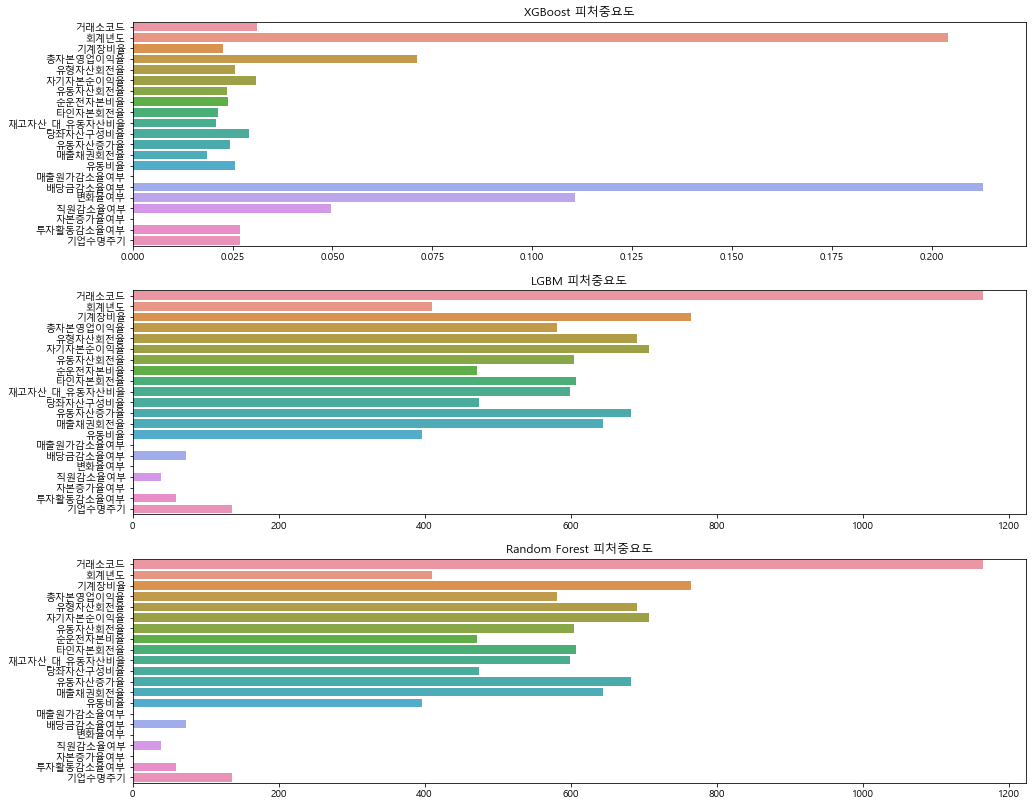

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(3, 1, squeeze=False)
fig.set_size_inches((16,14))

plt.title("피처중요도")
sns.barplot(x=xgb_wrapper.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("XGBoost 피처중요도")
sns.barplot(x=lgb_cr.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("LGBM 피처중요도")
sns.barplot(x=lgb_cr.feature_importances_, y=data.columns, ax=axes[2,0])
axes[2,0].title.set_text("Random Forest 피처중요도")

plt.show()

### 스태킹 앙상블

In [60]:
stacking = np.array([predictions, predictions_rf, w_preds])
stacking.shape

(3, 3143)

In [61]:
stacking = np.transpose(stacking)
stacking.shape

(3143, 3)

In [62]:
stacking[:10]

array([[0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 1]], dtype=int64)

In [63]:
lgb_cr.fit(stacking, y_test)
lgb_pred = lgb_cr.predict(stacking)
get_clf_eval(y_test, lgb_pred)

오차 행렬
[[3090    0]
 [  53    0]]
정확도: 0.9831, 정밀도: 0.0000, 재현율: 0.0000, f1: 0.0000


In [68]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = TimeSeriesSplit(n_splits=n_folds)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [70]:
# CV스태킹 알고리즘 각 모델에 적용
lg_train, lg_test = get_stacking_base_datasets(gs, x_train_ada, y_train_ada, x_test, 5)
rf_train, rf_test = get_stacking_base_datasets(rf_gs, x_train_ada, y_train_ada, x_test, 5)
dt_train, dt_test = get_stacking_base_datasets(xgb_grid, x_train_ada, y_train_ada, x_test,  5)    
# ada_train, ada_test = get_stacking_base_datasets(ada_clf, x_train_ada, y_train_ada, x_test, 5)

# CV스태킹 알고리즘 결과로 메타 모델 학습/시험에 필요한 result_a result_b 만들기 
Stack_final_X_train = np.concatenate((lg_train, rf_train, dt_train),axis=1)
Stack_final_X_test = np.concatenate((lg_test, rf_test, dt_test), axis=1)

# 메타 모델 학습
lgb_clf.fit(Stack_final_X_train, y_train)
stack_final = lgb_clf.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

GridSearchCV  model 시작 
	 폴드 세트:  0  시작 


KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822],\n           dtype='int64', length=1823)] are in the [columns]"